# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [45]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}units={units}&appid={weather_api_key}"
# Set variables
city_data = []
sets = 1
count = 1
# Print beginning of data retrieval
print("Beginning Data Revrieval")
print("=================================================")
# Beging FOR loop for retreiving data
for index, city in enumerate(cities):
    # Conditions counting for sets of 50
    if index >= 50 and index % 50 == 0:
        sets += 1
        count = 1
        time.sleep(10)
    # Setting url for retrieval
    city_url = query_url +"&q="+ city.replace(" ", "+")
    print(f"Processing record {count} of Set {sets} | {city}")
    count += 1
    # Setting try and exceptions
    
    try:
        response = requests.get(city_url).json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        clouds = response["clouds"]["all"]
        winds = response["wind"]["speed"]
        country = response["sys"]["country"]
        pulled_date = response["dt"]
        # Put inside a dictionary and append to the city_data list
        city_data.append({
            "City": city,
            "Lat": lat,
            "Lng": lng,
            "Max Temp.": temp_max,
            "Humidity": hum,
            "Cloudiness": clouds,
            "Wind Speed": winds,
            "Country": country,
            "Date": pulled_date
        })    
    except (KeyError, IndexError):
        print("City " + "\033[1m" + "not" + "\033[0m" + " found. Skipping...")
        pass

print("=================================================")
print("Data Retrieval Complete")
print("=================================================")

et 4 | sampit
Processing record 19 of Set 4 | airai
Processing record 20 of Set 4 | pisco
Processing record 21 of Set 4 | buchanan
Processing record 22 of Set 4 | kruisfontein
Processing record 23 of Set 4 | san roque
Processing record 24 of Set 4 | mouila
Processing record 25 of Set 4 | tiksi
Processing record 26 of Set 4 | san patricio
Processing record 27 of Set 4 | rundu
Processing record 28 of Set 4 | hofn
Processing record 29 of Set 4 | melipilla
Processing record 30 of Set 4 | nikolskoye
Processing record 31 of Set 4 | ozark
Processing record 32 of Set 4 | khagrachari
City not found. Skipping...
Processing record 33 of Set 4 | nizhneyansk
City not found. Skipping...
Processing record 34 of Set 4 | carnarvon
Processing record 35 of Set 4 | totkomlos
Processing record 36 of Set 4 | awjilah
Processing record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing record 38 of Set 4 | daru
Processing record 39 of Set 4 | champerico
Processing record 40 of Set 4 | dawlatabad
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
city_df = pd.DataFrame(city_data)
city_df.to_csv("City Weather.csv")
city_df.head()

,City,Lat,Lng,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,41.00,81,75,10.36,AR,1619153035
1,mecca,21.4267,39.8261,87.51,29,18,4.68,SA,1619152493
2,cidreira,-30.1811,-50.2056,69.51,74,10,17.20,BR,1619152493
3,kodiak,57.7900,-152.4072,42.80,87,90,10.36,US,1619152493
4,bluff,-46.6000,168.3333,52.00,93,100,3.00,NZ,1619152208


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [59]:
#  Get the indices of cities that have humidity over 100%.
humidity_indices = []
for i in city_df.index:
    if city_df.iloc[i, 4] > 100:
        humidity_indices.append(i)

len(humidity_indices)

0

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

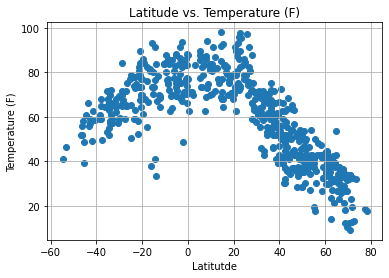

In [62]:
x_values = city_df["Lat"]
y_values = city_df["Max Temp."]
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs. Temperature (F)")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

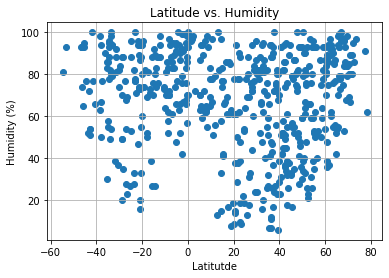

In [65]:
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

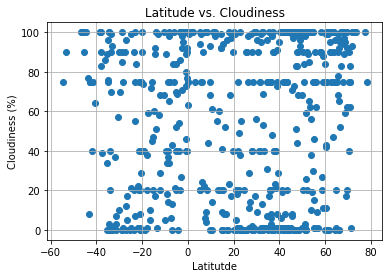

In [66]:
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

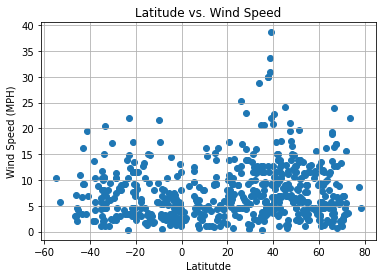

In [67]:
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs. Wind Speed")
plt.grid(True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression